In [1]:
from canvasapi import Canvas
import pdb
import json
from pathlib import Path
import os

# How-to Canvas API

By: Benjamin Chang

### Step 1

Fetch a canvas access token which will be used as your Canvas API key:

- go to `Settings`
- scroll down and click on `+ New Access Token`
- give your token an appropriate name, don't set an expiry date and hit `Generate Token`
- a pop-up looking like this should come up:

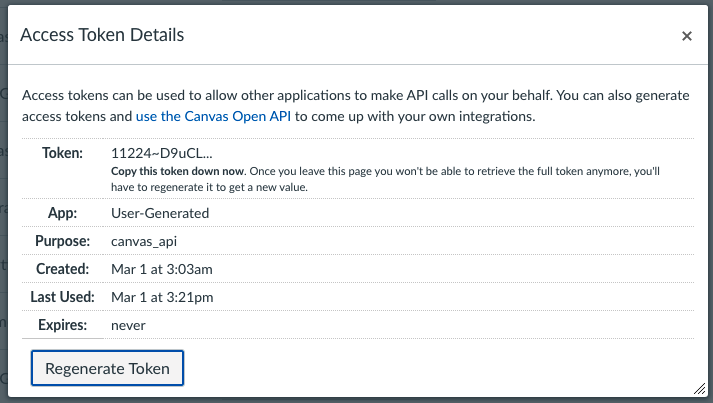

- copy all of the text in `Token:` and paste it as a string for the `API_KEY` variable in the next cell

In [2]:
API_URL = "https://canvas.ubc.ca/"
API_KEY = ""

canvas = Canvas(API_URL, API_KEY)

From now on, requests made to Canvas can be done using this `canvas` object we just created above. The `.get_course` method can fetch you a course instance if you provide it with the course ID. (these are the 5-6 numbers found at the end of the URL of your Canvas course.

In [3]:
ahl = canvas.get_course(51824) # this is for the Andrew & Harlan Sanbox course used for testing Canvas stuff
cs103 = canvas.get_course(48359) # this is for a CPSC 103 class (testing on actual class) that I was a TA for

In [4]:
print(ahl.name)
print(cs103.name)

Andrew & Harlan Sandbox
CPSC 103 V01 Introduction to Systematic Program Design


Documentation for Canvas API can be found here: https://canvasapi.readthedocs.io/en/stable/index.html

But we will go over some basics of the Canvas data structures. Everything in Canvas extends the original generic Canvas object class which at its core has at least an id attribute. Other fields and methods may vary depending on the subclasses you are dealing with but everything has an id attribute which will come in very useful. Here are some examples.

In [5]:
print(ahl.id) # notice that this is the same ID that we used to fetch the course originally

51824


The Canvas API does this weird thing where methods that return a list of items are in a PaginatedList data structure. The `get_modules()` method below gets a list of modules of a Canvas course. But see what happens when I try to look at the list.

In [8]:
cs103_modules = cs103.get_modules() 
print(cs103_modules)

<PaginatedList of type Module>


The workaound here is to **cast** the paginated list as type list.

In [11]:
modules = list(cs103_modules)
print(modules[0:3]) # I am slicing the list here because it gets very long and ugly to read but we are able
                    # to see a few modules and the attributes that constitute the object class

[Module(_requester=<canvasapi.requester.Requester object at 0x7f0f7a7c5c10>, id=258369, name=Course Administration, position=1, unlock_at=None, require_sequential_progress=False, publish_final_grade=False, prerequisite_module_ids=[], published=True, items_count=6, items_url=https://canvas.ubc.ca/api/v1/courses/48359/modules/258369/items, course_id=48359), Module(_requester=<canvasapi.requester.Requester object at 0x7f0f7a7c5c10>, id=258370, name="How To" Documents, position=2, unlock_at=None, require_sequential_progress=False, publish_final_grade=False, prerequisite_module_ids=[], published=True, items_count=4, items_url=https://canvas.ubc.ca/api/v1/courses/48359/modules/258370/items, course_id=48359), Module(_requester=<canvasapi.requester.Requester object at 0x7f0f7a7c5c10>, id=258371, name=Language, position=3, unlock_at=None, require_sequential_progress=False, publish_final_grade=False, prerequisite_module_ids=[], published=True, items_count=6, items_url=https://canvas.ubc.ca/api/v

In [13]:
for m in modules:
    print(m.name, m.id)

Course Administration 258369
"How To" Documents 258370
Language 258371
Design Recipes 258372
Sample Exams 258373
Module 1: Intro 258374
Module 2: HtDF 258375
Module 3: HtDD 258376
Module 4: Compound 258377
Module 5: Arbitrary Sized Data 258378
Module 6: One Task Per Function 258379
Module 7: HtDAP 258380
Module 8: Visualization 258381
Project 258382
Looking ahead: programming in Python beyond CPSC 103 258383
Practice Pre-Lecture Assignments 258384
Practice Code Reviews 258385
Practice Test 270450
Test 1 270397
Test 2 276156
Test 3 282861
Final Exam 290003


Be careful though, the fields (except for ID) are not consitent among the Canvas object types. Some of them might not even have an attribute called `name`! There is a ton of functionality with Canvas API especially with administrative functionality (which doesn't really apply to us), but in general your workflow should always start from the `Course` object itself: https://canvasapi.readthedocs.io/en/stable/course-ref.html 

With the course as the starting point, you will likely be able to fetch and complete anything you need. Some methods related to courses you might find you will need include: `get_assignments()` or `get_folders()`.

### Uploading/Deleting Files

Uploading files occurs at the Course object level, meaning the method call looks something like this:

`course_object.upload(FILE)`

Note that the file may be the file name itself or a path to the file. Building off of the CPSC 103 course above, say I wanted to upload a file called `grading_rubric` into the course, then the function call would go as the following: 

`cs103.upload('grading_rubric')`

Deleting files on the other hand takes place at the File level.

`file_object.delete()`

Note that because this method occurs at the File object level, you must already have access to the File object itself. There are different ways of doing this, one is to manually go through all the files in the course and select out the desired file into a local variable. Another way would actually be to request the file via its ID, which you can find by using the `.id` attribute shown in above examples.

The above demonstrations extend beyond Files and have applications in all the different Canvas objects that could exist in a Course object. E.g. assignments, quizzes, modules, etc. In all cases each object is deleted at its own level while it is uploaded/added to the course via its own method in the Canvas course object.